# PROJECT PHASE 2 SUBMISSION

# NAMES: Madison, Nakul, Huy, Mark

## Central motivation of the project

We wanted to find how the Economic Growth of Countries Affect CO2 Emissions. As countries progress economically, they face challenges related to climate sustainabiliy and preservation. Tracking CO2 emissions of countries can help predict future CO2 emissions as more countries become developed. 

1. How does the CO2 emissions of developing countries help predict future climate issues. 

2. How does economic growth impact pollution by country; is there a corellation between economic output and poluttion. 




## Data Processing Pipeline: 
- we called the `wb` API with the following parameters: 
    - 'NY.GDP.PCAP.CD' and 'EN.ATM.CO2E.KT' keywords represent the GDP per Capita and CO2 Emission
    - the range of years from 1960 to 2023
    - skip blank countries
    - label is True, so that we have the countries' full names
    - specify each column as a series
- we reset the index, so that there's a separate index column (instead of using a data column as index)
- we dropped the country abbreviation (i.e. USA) and time (i.e. YR2019) columns
- we renamed the following columns:
    - 'EN.GHG.ALL.MT.CE.AR5' to 'CO2 Emission'
    - 'NY.GDP.PCAP.CD' to 'GDP per Capita'
    - 'Time' to 'Year'

## Note: the `data keywords` like `NY.GDP.PCAP.CD` and `EN.ATM.CO2E.KT` *will* change. The `column names` in the df *will also* change
If any keyword no longer works, just look up 'world bank api' + keyword. <br>
See the pictures below:

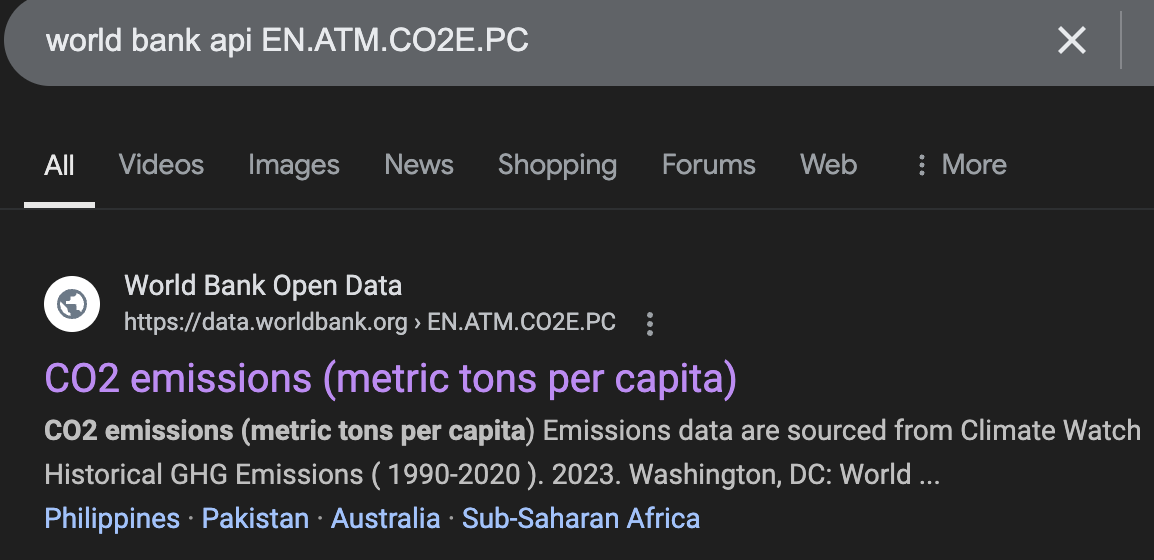
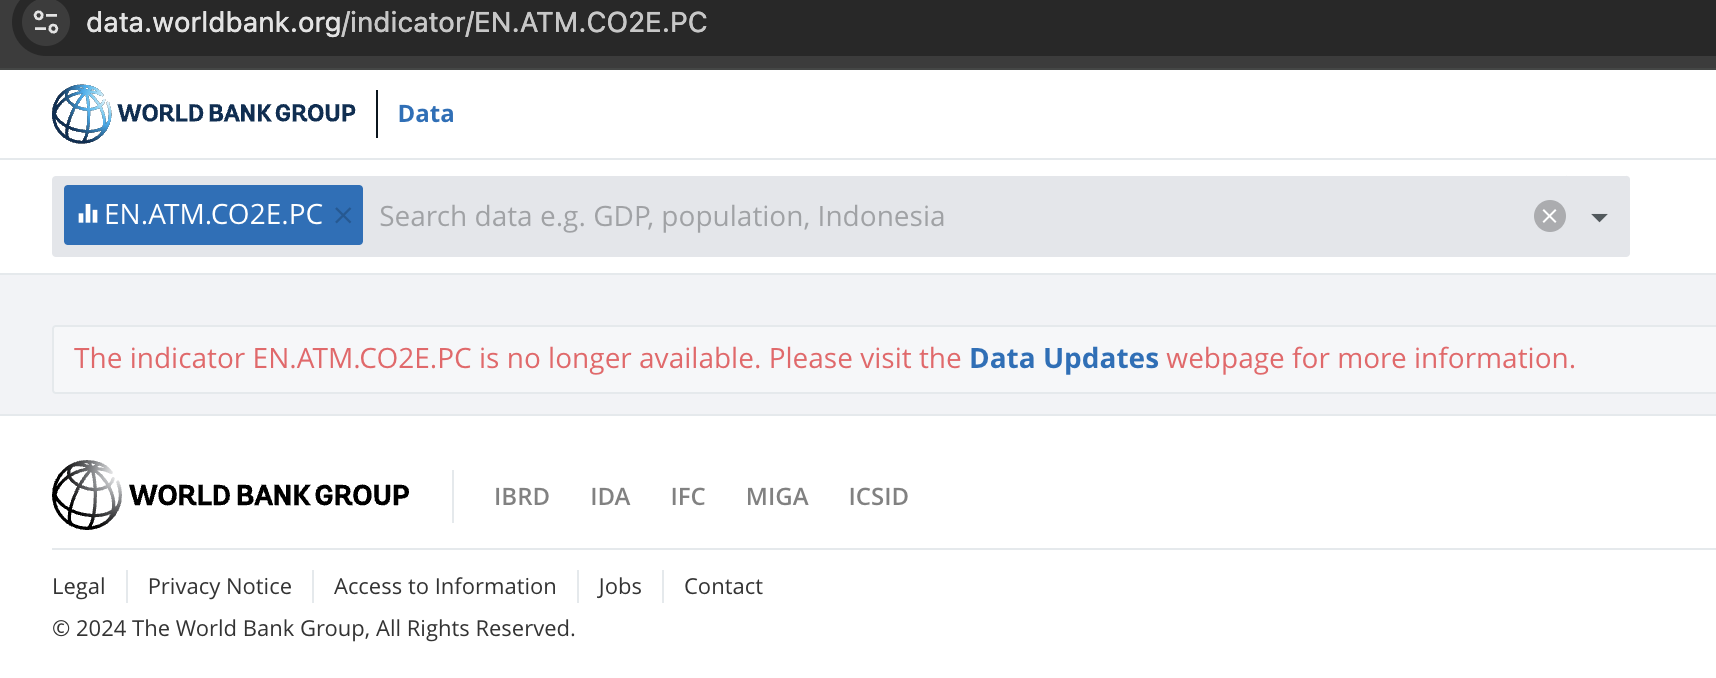 <br>
## Click on 'Data Updates'
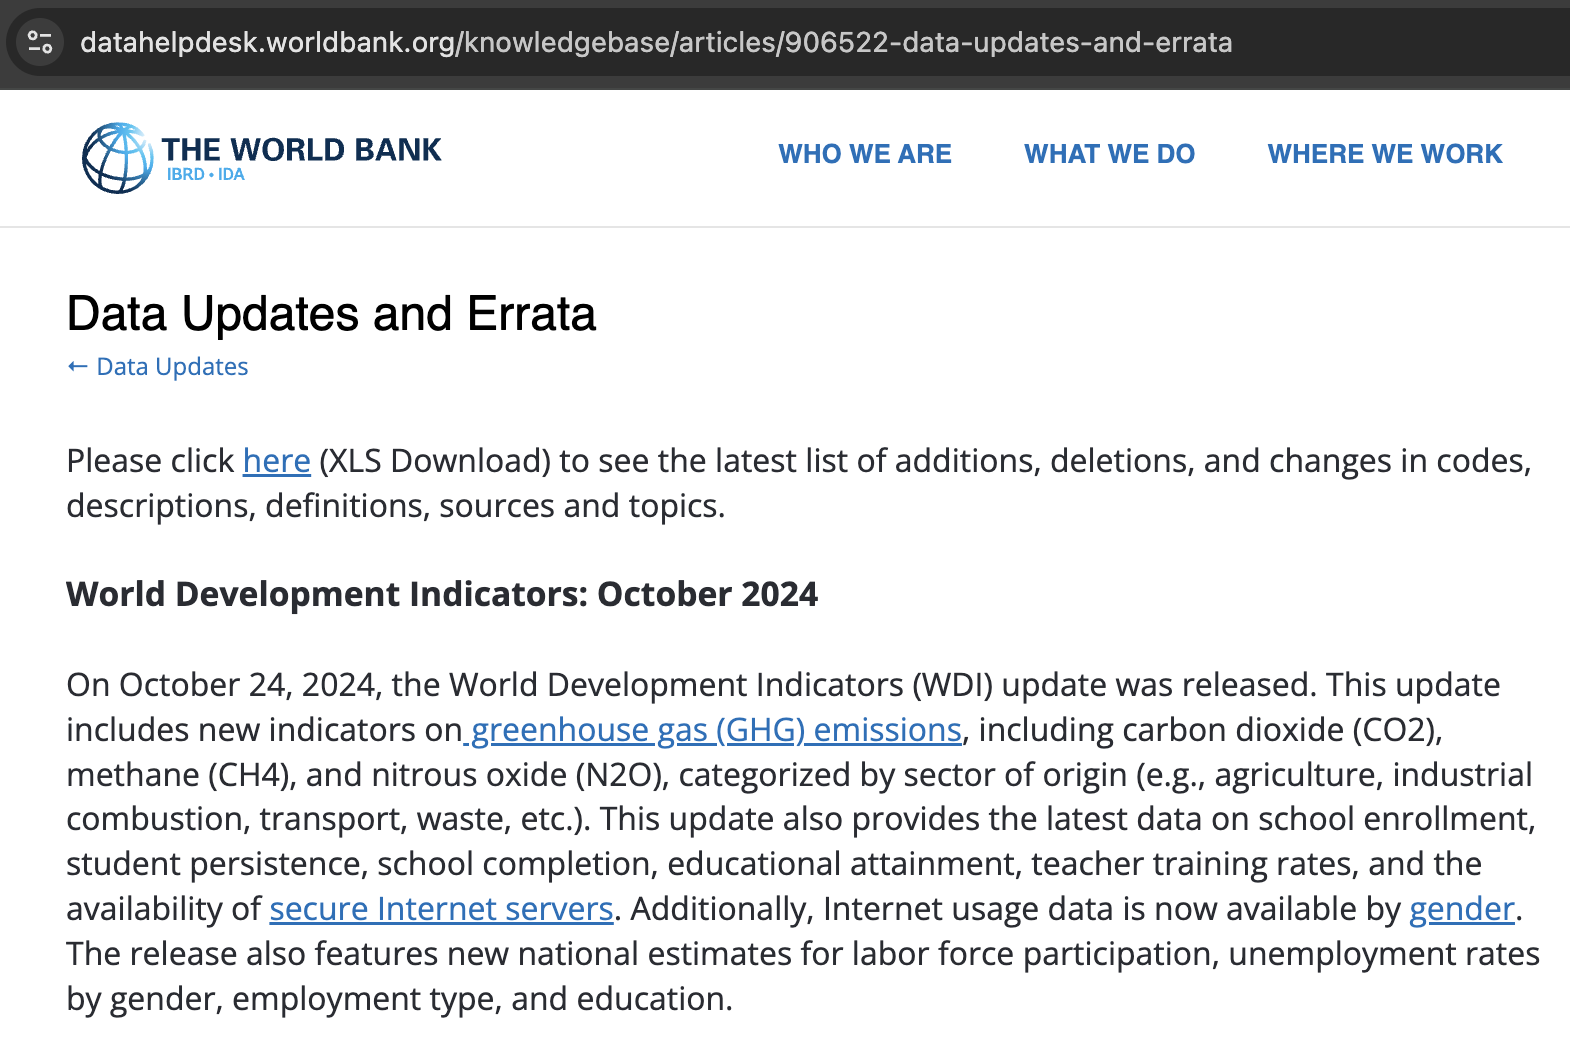 <br>
## The 'Data Updates' blog will list the URLs to the data with changed keywords.

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from bs4 import BeautifulSoup
import numpy as np
from datetime import time

# import wbgapi as wb 
# documentation: https://pypi.org/project/wbgapi/

In [7]:
df = pd.read_csv('gdp_co2_1960_2023.csv')

In [8]:
us_bool = (df.loc[:, 'Country'] == 'United States')
us = df.loc[us_bool, :]
us

,Unnamed: 0,Country,Year,CO2 Emission,GDP per Capita
447,447,United States,2023,NaN,81695.187071
448,448,United States,2022,6009.5848,77246.673883
449,449,United States,2021,5915.5787,71055.876194
450,450,United States,2020,5607.9657,64317.398913
451,451,United States,2019,6145.7474,65548.070785
...,...,...,...,...,...
506,506,United States,1964,NaN,3565.314430
507,507,United States,1963,NaN,3366.369790
508,508,United States,1962,NaN,3236.013112
509,509,United States,1961,NaN,3059.160821


In [9]:
df.columns

Index(['Unnamed: 0', 'Country', 'Year', 'CO2 Emission', 'GDP per Capita'], dtype='object')

In [10]:
df.to_csv('gdp_co2_1960_2023.csv')

In [11]:
fig = px.scatter(df, x="GDP per Capita", y="CO2 Emission",
                 hover_data=['Country', 'Year'], 
                 title = 'GDP per Capita vs CO2 Emission')
fig.update_xaxes(title_text = 'GDP per Capita', tickangle= 45)
fig.update_yaxes(title_text='CO2 Emission')
fig.show()

In [12]:
fig = px.scatter(us.sort_values(by='Year', ascending=True), x='Year', y='CO2 Emission',
                 hover_data=['CO2 Emission', 'GDP per Capita'], 
                 title = 'GDP per Capita vs CO2 Emission: US')
fig.update_xaxes(title_text = 'Year', tickangle= 45)
fig.update_yaxes(title_text='CO2 Emission')
fig.show()

In [ ]:
# linear regression

# North America

sections = ['High income', 'Middle income', 'Least developed countries: UN classification']


def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew


def create_lin_reg(sections):

    updated_df = df[df['Year'] >= 1970]

    for section in sections:
        co2_data = np.array(updated_df['CO2 Emission'][updated_df[section]])
        gdp =  np.array(updated_df['GDP per Capita'])

        gdp_bias = add_bias_column(gdp)


        coefficients, _, _, _ = np.linalg.lstsq(gdp_bias, co2_data, rcond=None)
    
    return coefficients


create_lin_reg(sections)







# South Asia

# Sub-Saharan Africa






** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  5 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares